In [1]:
import stan_utility

In [2]:
model = stan_utility.compile_model_code("""
data {
  // dimensionality
  int N;
}
parameters {
  real<lower=-10.0, upper=10.0> x[N];
}
model {
  // rosenbrock formula:
  for (i in 1:N-1) {
     target += -2 * (100 * square(x[i+1] - square(x[i])) + square(1 - x[i]));
  }
}
""")

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_c59ca88870c842cfb78faf17432a0edc NOW.


Compiling slimmed Stan code[anon_model_c59ca88870c842cfb78faf17432a0edc]:
  1: data {
  2: int N;
  3: }
  4: parameters {
  5: real<lower=-10.0, upper=10.0> x[N];
  6: }
  7: model {
  8: for (i in 1:N-1) {
  9: target += -2 * (100 * square(x[i+1] - square(x[i])) + square(1 - x[i]));
 10: }
 11: }


In [3]:
data = dict(N=10)

In [4]:
results = stan_utility.sample_model(model, data, seed=42, outprefix="rosenbrock-10")


Data
----
  N         : 10

sampling from model ...
processing results ...
Inference for Stan model: anon_model_c59ca88870c842cfb78faf17432a0edc.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
x[1]     1.0  6.4e-4   0.03   0.94   0.98    1.0   1.01   1.05   2005    1.0
x[2]    0.99  7.0e-4   0.03   0.93   0.97   0.99   1.01   1.05   1809    1.0
x[3]    0.99  9.2e-4   0.03   0.92   0.97   0.99   1.01   1.05   1259    1.0
x[4]    0.98  1.4e-3   0.04   0.89   0.96   0.99   1.01   1.05    934    1.0
x[5]    0.97  2.4e-3   0.06   0.82   0.95   0.98   1.01   1.06    705    1.0
x[6]    0.95  4.0e-3    0.1   0.69   0.91   0.98   1.02   1.09    647    1.0
x[7]    0.93  6.5e-3   0.17   0.48   0.85   0.96   1.04   1.16    665    1.0
x[8]    0.88    0.01   0.28   0.25   0.73   0.92   1.08   1.33    713    1.0
x[9]    0.86    0.02   0.46   0.08   0.53 

In [5]:
%matplotlib inline

In [6]:
results.posterior

<xarray.Dataset>
Dimensions:  (chain: 4, draw: 1000, x_dim_0: 10)
Coordinates:
  * chain    (chain) int64 0 1 2 3
  * draw     (draw) int64 0 1 2 3 4 5 6 7 8 ... 992 993 994 995 996 997 998 999
  * x_dim_0  (x_dim_0) int64 0 1 2 3 4 5 6 7 8 9
Data variables:
    x        (chain, draw, x_dim_0) float64 1.022 1.003 0.9865 ... 0.3798 0.1795
Attributes:
    created_at:                 2020-06-04T13:01:33.455362
    arviz_version:              0.7.0
    inference_library:          pystan
    inference_library_version:  2.19.1.1

                   x: 0.9513 +- 0.3582
Removed no burn in


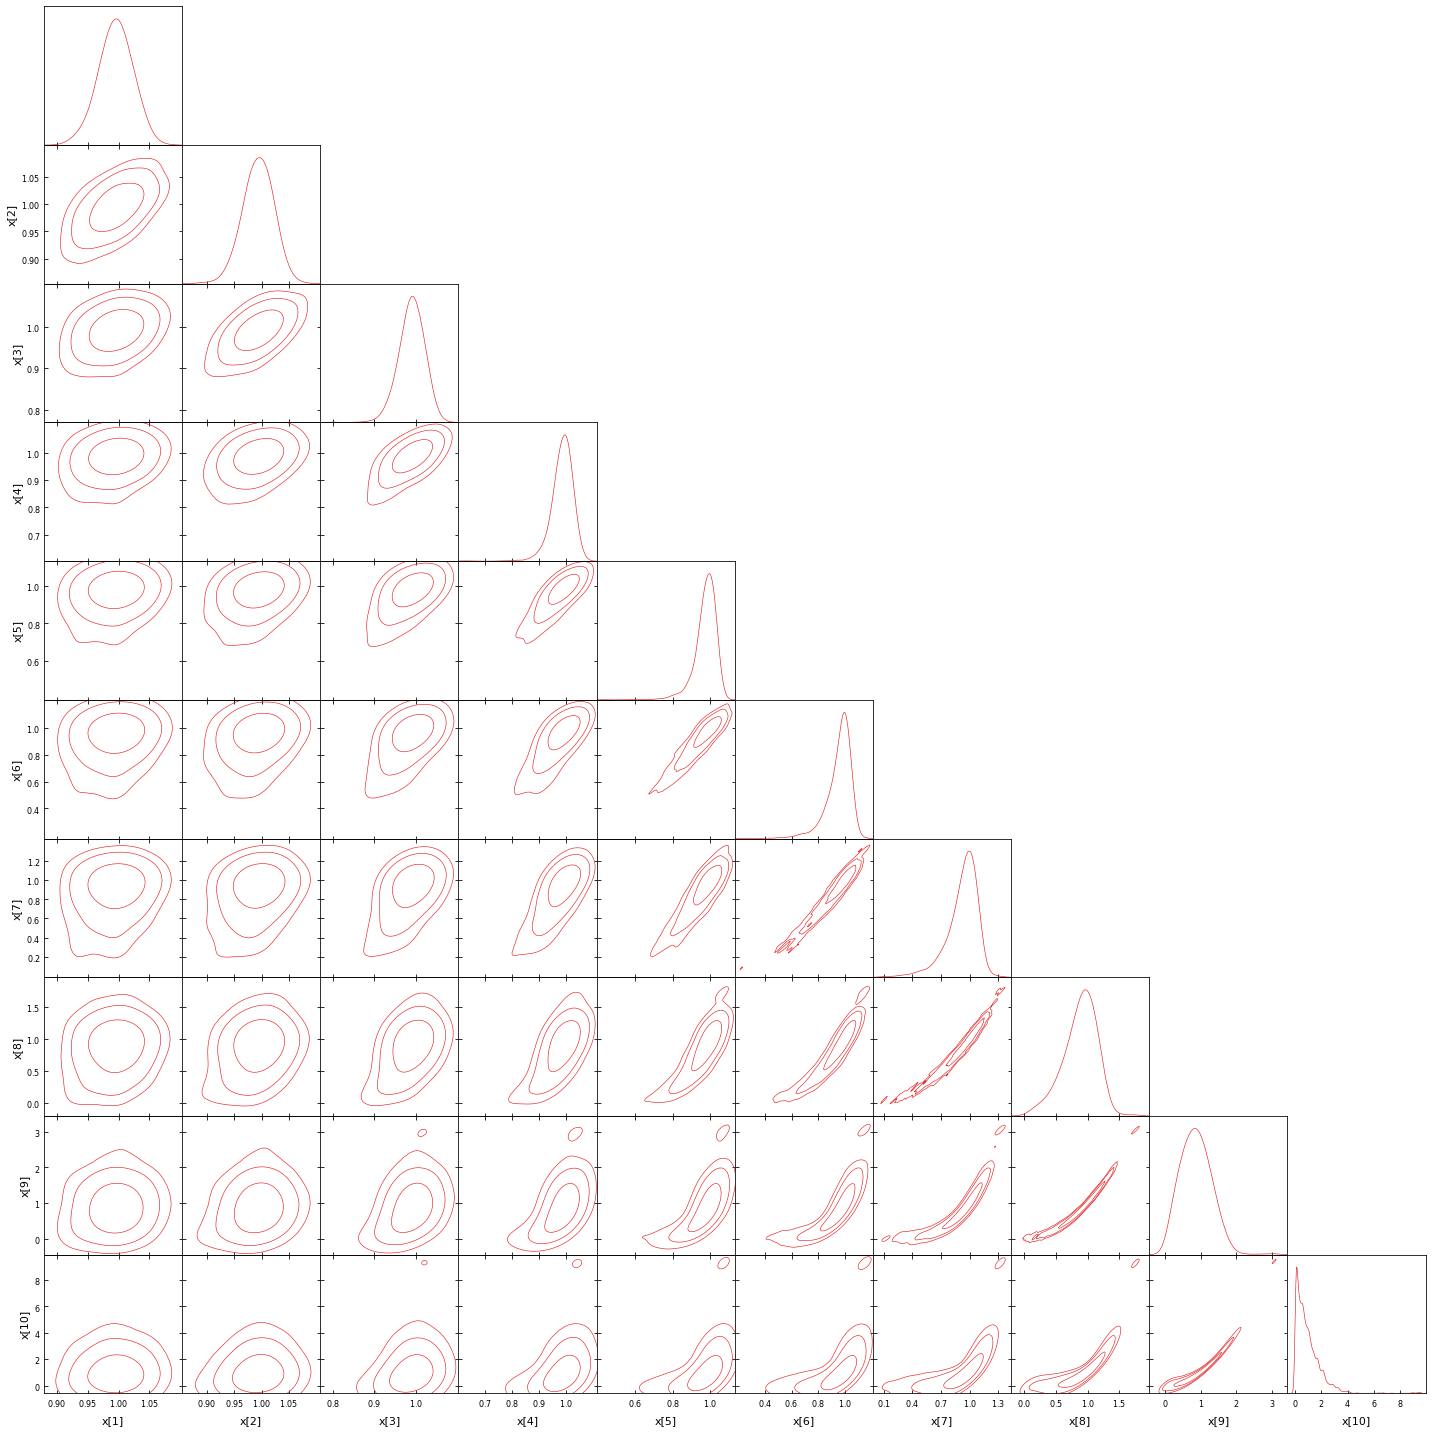

In [7]:
stan_utility.plot_corner(results)